# Aufgabe 1

## 1.)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv("resources/iris.csv")
pd.DataFrame(iris)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


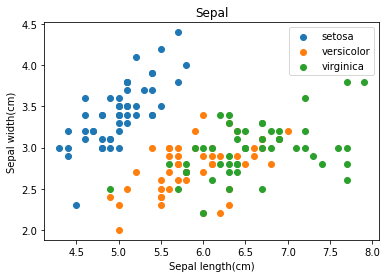

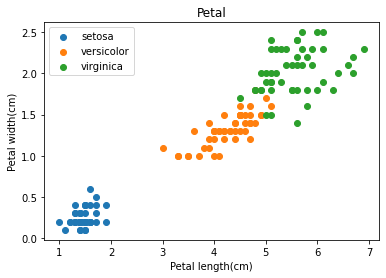

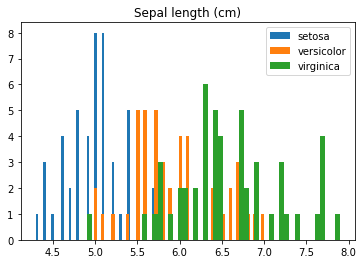

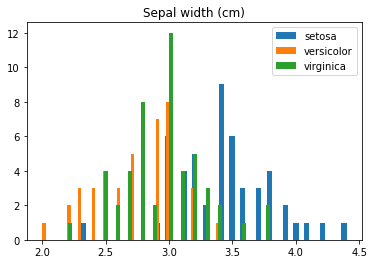

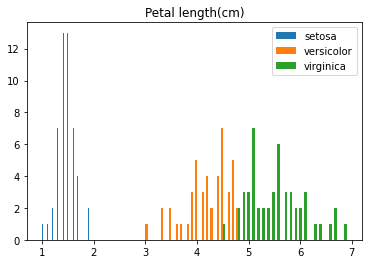

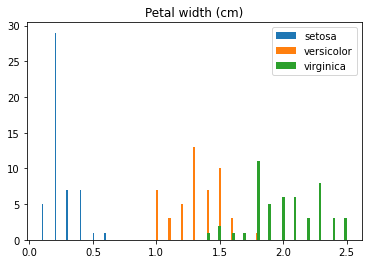

In [2]:
# Get feature names
species_names = iris.loc[:, "species"].unique()

# Create list for each feature with corresponding species
feature_one = []
feature_two = []
feature_three = []
feature_four = []

# Get features for each species
for species_name in species_names:
    species = iris[iris["species"] == species_name]
    sepal_length = species.loc[:, "sepal length (cm)"]
    sepal_width = species.loc[:, "sepal width (cm)"]
    petal_length = species.loc[:, "petal length (cm)"]
    petal_width = species.loc[:, "petal width (cm)"]
    
    # Append it to created lists and add species name as secondary information
    feature_one.append((sepal_length, species_name))
    feature_two.append((sepal_width, species_name))
    feature_three.append((petal_length, species_name))
    feature_four.append((petal_width, species_name))

# Plot
def scatter_plot(feature_one, feature_two, title, xlabel, ylabel):
    """Helper function for scatter plotting a feature list in context of this exercise."""
    fig, ax = plt.subplots()
    for feature_value, feature_test in zip(feature_one, feature_two):
        xv = feature_value[0]
        yv = feature_test[0]
        name = feature_value[1]
        ax.scatter(xv, yv, label=name)
        ax.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
    
def hist_plot(feature_list, title):
    """Helper function for hist plotting a feature list in context of this exercise."""
    fig, ax = plt.subplots()
    for feature_value in feature_list:
        values = feature_value[0]
        name = feature_value[1]
        ax.hist(values, label=name, bins=50)
        ax.legend()
    plt.title(title)
    plt.show()
    


scatter_plot(feature_one, feature_two, "Sepal", "Sepal length(cm)", "Sepal width(cm)")
scatter_plot(feature_three, feature_four, "Petal", "Petal length(cm)", "Petal width(cm)")

hist_plot(feature_one, "Sepal length (cm)")    
hist_plot(feature_two, "Sepal width (cm)")
hist_plot(feature_three, "Petal length(cm)")
hist_plot(feature_four, "Petal width (cm)")

    
    



## 2.)

In [3]:
# Mittelwert

avg_sepal_length = iris.loc[:, "sepal length (cm)"].mean()
avg_sepal_width = iris.loc[:, "sepal width (cm)"].mean()
avg_petal_length = iris.loc[:, "petal length (cm)"].mean()
avg_petal_width = iris.loc[:, "petal width (cm)"].mean()
df = pd.DataFrame(
    [[avg_sepal_length, avg_sepal_width, avg_petal_length, avg_petal_width]],
    columns = ["Average sepal length", "Average sepal width", "Average petal length", "Average petal width"],
     
)
df

,Average sepal length,Average sepal width,Average petal length,Average petal width
0,5.843333,3.057333,3.758,1.199333


In [4]:
# Standardabweichung

std_sepal_length = iris.loc[:, "sepal length (cm)"].std()
std_sepal_width = iris.loc[:, "sepal width (cm)"].std()
std_petal_length = iris.loc[:, "petal length (cm)"].std()
std_petal_width = iris.loc[:, "petal width (cm)"].std()
df = pd.DataFrame(
    [[std_sepal_length, std_sepal_width, std_petal_length, std_petal_width]],
    columns = ["Std deviation sepal length", "Std deviation sepal width", "Std deviation petal length", "Std deviaton petal width"],
     
)
df

,Std deviation sepal length,Std deviation sepal width,Std deviation petal length,Std deviaton petal width
0,0.828066,0.435866,1.765298,0.762238


In [5]:
# IQR
quantile_sepal_length = iris.loc[:, "sepal length (cm)"].quantile(.75) - iris.loc[:, "sepal length (cm)"].quantile(.25)
quantile_sepal_width = iris.loc[:, "sepal width (cm)"].quantile(.75) - iris.loc[:, "sepal width (cm)"].quantile(.25)
quantile_petal_length = iris.loc[:, "petal length (cm)"].quantile(.75) - iris.loc[:, "petal length (cm)"].quantile(.25)
quantile_petal_width = iris.loc[:, "petal width (cm)"].quantile(.75) - iris.loc[:, "petal width (cm)"].quantile(.25)
df = pd.DataFrame(
    [[quantile_sepal_length, quantile_sepal_width, quantile_petal_length, quantile_petal_width]],
    columns = ["IQR sepal length", "IQR sepal width", "IQR petal length", "IQR petal width"],
     
)
df

,IQR sepal length,IQR sepal width,IQR petal length,IQR petal width
0,1.3,0.5,3.5,1.5


## Gruppiert nach Species


In [6]:
# Mittelwert
df = iris.groupby("species").mean()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
# Standardabweichung
df = iris.groupby("species").std()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [9]:
# IQR
df = iris.groupby("species").agg((lambda x: x.quantile(.75) - x.quantile(.25)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,0.400,0.475,0.175,0.1
versicolor,0.700,0.475,0.600,0.3
virginica,0.675,0.375,0.775,0.5
